# Global Animal Health Incident Reports (2005–2025)

## A Longitudinal Analysis of Outbreak Trends, Species Vulnerability, and Surveillance Behavior

This analysis presents a structured view into two decades of global animal disease reporting, sourced from official submissions to the World Organisation for Animal Health [WAHIS](https://wahis.woah.org/#/home). The dataset includes over 20 years of outbreak records, covering hundreds of countries and dozens of reportable diseases.

While the raw data represents discrete incident submissions, this notebook reconstructs the underlying storylines:
- Where are diseases emerging or persisting?
- How have surveillance systems evolved?
- What species are prioritized in global biosecurity?
- And what does the pattern of reporting itself reveal about risk, readiness, and attention?

The goal is not only to quantify disease frequency but to expose patterns that speak to broader shifts in animal health governance, regional vulnerabilities, and global responsiveness.

The result is an exploratory foundation for future modeling, forecasting, or integration with ecological, trade, or public health datasets.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt
import re

alt.renderers.enable('default')
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

,report_id,country,region,date_reported,species,disease,confirmed_cases,deaths,outbreak_status,notes,source,latitude,longitude
0,7cda1a50-2034-4b9a-b356-6219c91c13e1,Mongolia,NaN,2022-03-08,Unknown,Peste des petits ruminants virus (Inf. with),0,0,Resolved,First occurrence in a zone or a compartment,https://wahis.woah.org,NaN,NaN
1,90e92d52-100a-46e8-9e00-27c3a0eec95f,Niger,NaN,2022-03-08,Unknown,Rift Valley fever virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN
2,e6845074-51c6-4f05-adb7-c154ba203999,Israel,NaN,2022-03-06,Poultry,High pathogenicity avian influenza viruses (po...,0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN
3,5ee290fe-e077-4fbb-afe7-924cfbbc5269,Kazakhstan,NaN,2022-03-04,Cattle,Foot and mouth disease virus (Inf. with),0,0,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN
4,e9ca57c8-6e8e-4219-89ea-493cb1b1c6d6,China (People's Rep. of),NaN,2022-03-04,Unknown,Burkholderia mallei (Inf. with) (Glanders),0,0,Resolved,First occurrence in the country,https://wahis.woah.org,NaN,NaN


In [ ]:
# Load dataset
df = pd.read_csv('animal_health_incidents.csv', parse_dates=['date_reported'])
df.head()

In [20]:
# Info for dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   report_id        5579 non-null   object        
 1   country          5579 non-null   object        
 2   region           0 non-null      float64       
 3   date_reported    5579 non-null   datetime64[ns]
 4   species          5579 non-null   object        
 5   disease          5579 non-null   object        
 6   confirmed_cases  5579 non-null   int64         
 7   deaths           5579 non-null   int64         
 8   outbreak_status  5579 non-null   object        
 9   notes            5579 non-null   object        
 10  source           5579 non-null   object        
 11  latitude         0 non-null      float64       
 12  longitude        0 non-null      float64       
 13  year_month       5579 non-null   period[M]     
dtypes: datetime64[ns](1), float64(3), int64(

In [21]:
# Summary stats
df.describe(include='all')

,report_id,country,region,date_reported,species,disease,confirmed_cases,deaths,outbreak_status,notes,source,latitude,longitude,year_month
count,5579,5579,0.0,5579,5579,5579,5579.0,5579.0,5579,5579,5579,0.0,0.0,5579
unique,5579,187,NaN,NaN,7,141,NaN,NaN,1,14,1,NaN,NaN,242
top,5062ecd5-aa85-464c-9086-205efb4a5aac,Russia,NaN,NaN,Poultry,High pathogenicity avian influenza viruses (po...,NaN,NaN,Resolved,Recurrence of an eradicated disease,https://wahis.woah.org,NaN,NaN,2025-03
freq,1,340,NaN,NaN,2098,966,NaN,NaN,5579,3696,5579,NaN,NaN,169
mean,NaN,NaN,NaN,2018-04-17 02:09:49.783115264,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,2005-01-05 00:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,2014-02-22 00:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,2019-09-08 00:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2022-12-20 00:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,2025-03-26 00:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


## 🧭 Interpreting Country-Level Reporting Patterns

This chart reveals the top 15 countries by the number of outbreak reports submitted to WAHIS.

**Key Observations:**
- **Russia**, **Germany**, and **Ukraine** top the list, each with over 250 reports.
- **China**, **UK**, **Italy**, and **France** are also highly represented — suggesting either high outbreak volumes, strong surveillance, or both.
- **United States** ranks 13th — confirming its participation in global reporting, though lower than expected.

**Why might some countries dominate the top of the chart?**

Several factors could influence this:

- **Surveillance Infrastructure**  
Countries like Germany and the UK have well-developed animal health monitoring systems and strong regulatory compliance with OIE reporting requirements.

- **Livestock Density**  
High production zones (e.g., poultry in Eastern Europe or swine in China) naturally yield more outbreak reports due to increased disease exposure.

- **Regional Disease Pressure**  
Eastern European countries (e.g., Romania, Moldova, Ukraine) have seen ongoing struggles with **African Swine Fever** and **Avian Influenza**, possibly inflating reporting volumes.

- **Reporting Philosophy**  
Some nations report at **finer granularity** (every event), while others group outbreaks into aggregate submissions. This impacts raw counts.

---

High report counts do not necessarily mean worse disease control — they may reflect **proactive monitoring**, **policy mandates**, or **epidemic pressure** in certain regions.


In [5]:
top_countries = df['country'].value_counts().head(15).reset_index()
top_countries.set_axis(['country', 'count'], axis=1)

alt.Chart(top_countries).mark_bar().encode(
    x=alt.X('count:Q', title='Report Count'),
    y=alt.Y('country:N', sort='-x', title='Country'),
    tooltip=['country', 'count']
).properties(
    title='Top 15 Countries by Report Volume',
    width=600,
    height=400
).configure_title(anchor='start')


alt.Chart(...)

## Most Frequently Reported Animal Diseases

The chart below highlights the ten most frequently reported animal diseases submitted to WAHIS. These reports reveal the global landscape of high-priority animal health threats.

**Key Observations:**

- **Avian Influenza dominates** the dataset. Both high and low pathogenic strains appear, with **HPAI (Highly Pathogenic Avian Influenza)** being the single most reported disease — reflecting global poultry vulnerability and aggressive surveillance.
- **African Swine Fever (ASF)** is the second most reported. Its emergence and rapid spread in Eastern Europe, Asia, and Africa has led to major economic losses in the pork industry.
- **Foot and Mouth Disease** remains a classic endemic threat in many developing countries with large cattle populations.
- **Zoonotic threats** like Anthrax, Rabies, and West Nile Fever appear — showing ongoing crossover risk to human populations.
- **Newcastle Disease** and **Bluetongue** also rank high due to their transmissibility and economic impact in poultry and ruminants respectively.

---

### What’s Driving This Pattern?

Several factors explain why these diseases dominate:

1. **Economic Significance**: Poultry and swine are globally traded and densely farmed — diseases affecting them trigger immediate attention.
2. **Zoonotic Risk**: Several of these pathogens can infect or threaten humans, triggering mandatory reporting.
3. **Policy Mandates**: The OIE (WOAH) classifies these diseases as notifiable; countries are obligated to report them.
4. **Surveillance Capacity**: Countries often prioritize testing and reporting on known high-impact diseases with available diagnostics.
5. **Outbreak History**: Recent waves of ASF, Avian Influenza, and Bluetongue explain spikes in regional submissions.

---

This distribution is not just a reflection of disease occurrence — it’s a mirror of global biosecurity priorities, animal-human interface risks, and international trade sensitivities.


In [6]:
top_diseases = df['disease'].value_counts().head(10).reset_index()
top_diseases.set_axis(['disease', 'count'], axis=1)

alt.Chart(top_diseases).mark_bar(color='teal').encode(
    x=alt.X('count:Q'),
    y=alt.Y('disease:N', sort='-x'),
    tooltip=['disease', 'count']
).properties(
    title='Top 10 Reported Diseases',
    width=600
)


alt.Chart(...)

## Normalized Annual Disease Trends

This visualization normalizes top disease report counts by the total number of reports submitted each year, helping control for the growing scale of global reporting over time.

### Key Benefits of Normalization:

- Reveals **relative importance** of diseases each year
- Highlights **shifting priority or emergence patterns**
- Avoids misinterpretation due to **increased volume** of global submissions in recent years

### Insights:

- Some diseases (e.g., Avian Influenza) maintain dominance over time, even as total reports increase
- Others (e.g., African Swine Fever) rise sharply in relative share during epidemic waves
- This metric is useful for **resource allocation** and **policy prioritization**

The normalized trend allows us to focus not just on which diseases are reported more, but which **dominate attention relative to all reported events**.


In [28]:
# Map names for plot display
name_map = {
    "High pathogenicity avian influenza viruses (poultry) (Inf. with)": "HPAI (Poultry)",
    "African swine fever virus (Inf. with)": "ASF",
    "Foot and mouth disease virus (Inf. with)": "FMD",
    "Bluetongue virus (Inf. with)": "Bluetongue",
    "Influenza A viruses of high pathogenicity (Inf. with) (non-poultry including wild birds) (2017-)": "HPAI (Wild Birds)"
}

disease_by_year['disease'] = disease_by_year['disease'].replace(name_map)


In [30]:

fig = px.line(
    disease_by_year,
    x='year',
    y='normalized',
    color='disease',
    markers=True,
    line_shape='spline',  # smoother curves
    title='Normalized Top 5 Disease Reports by Year'
)

fig.update_layout(
    yaxis_title='Proportion of Total Annual Reports',
    xaxis_title='Year',
    title_font_size=20,
    font=dict(size=14),
    legend=dict(
        title='Disease',
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='center',
        x=0.5
    ),
    plot_bgcolor='white',
    margin=dict(l=50, r=50, t=80, b=50),
    hovermode='x unified'
)

fig.update_traces(marker=dict(size=6, line=dict(width=1, color='DarkSlateGrey')))
fig.show()


## Country-Level Disease Burden Heatmap

This heatmap illustrates the frequency of top disease reports across the 20 most active reporting countries.

### Key Observations:

- **Russia, Germany, and Ukraine** show high reporting across multiple diseases, consistent with their overall high submission volume.
- **African Swine Fever** dominates in Eastern Europe — particularly Romania, Moldova, and Ukraine.
- **Avian Influenza strains** are widespread, appearing in reports across both Asia and Europe.
- Countries like **France and Italy** report a broader spectrum of diseases, possibly reflecting more granular or proactive surveillance systems.

### Use Case:

This view helps:
- Understand **geographical disease clustering**
- Identify **reporting behavior gaps** or **surveillance blind spots**
- Support **risk-based resource allocation** for veterinary authorities.


In [ ]:

def shorten_disease(d):
    d = d.strip()

    if 'High pathogenicity avian influenza' in d:
        return 'HPAI'
    elif 'African swine fever' in d:
        return 'ASF'
    elif 'Influenza A viruses of high pathogenicity' in d and 'wild birds' in d:
        return 'HPAI-Wild'
    elif 'Foot and mouth disease' in d:
        return 'FMD'
    elif 'Bluetongue' in d:
        return 'Bluetongue'
    elif 'Anthrax' in d:
        return 'Anthrax'
    elif 'Newcastle' in d:
        return 'Newcastle'
    elif 'Low pathogenic avian influenza' in d:
        return 'LPAI'
    elif 'Rabies' in d:
        return 'Rabies'
    elif 'West Nile' in d:
        return 'WNF'
    else:
        return d

# Apply to column
df['disease_short'] = df['disease'].apply(shorten_disease)

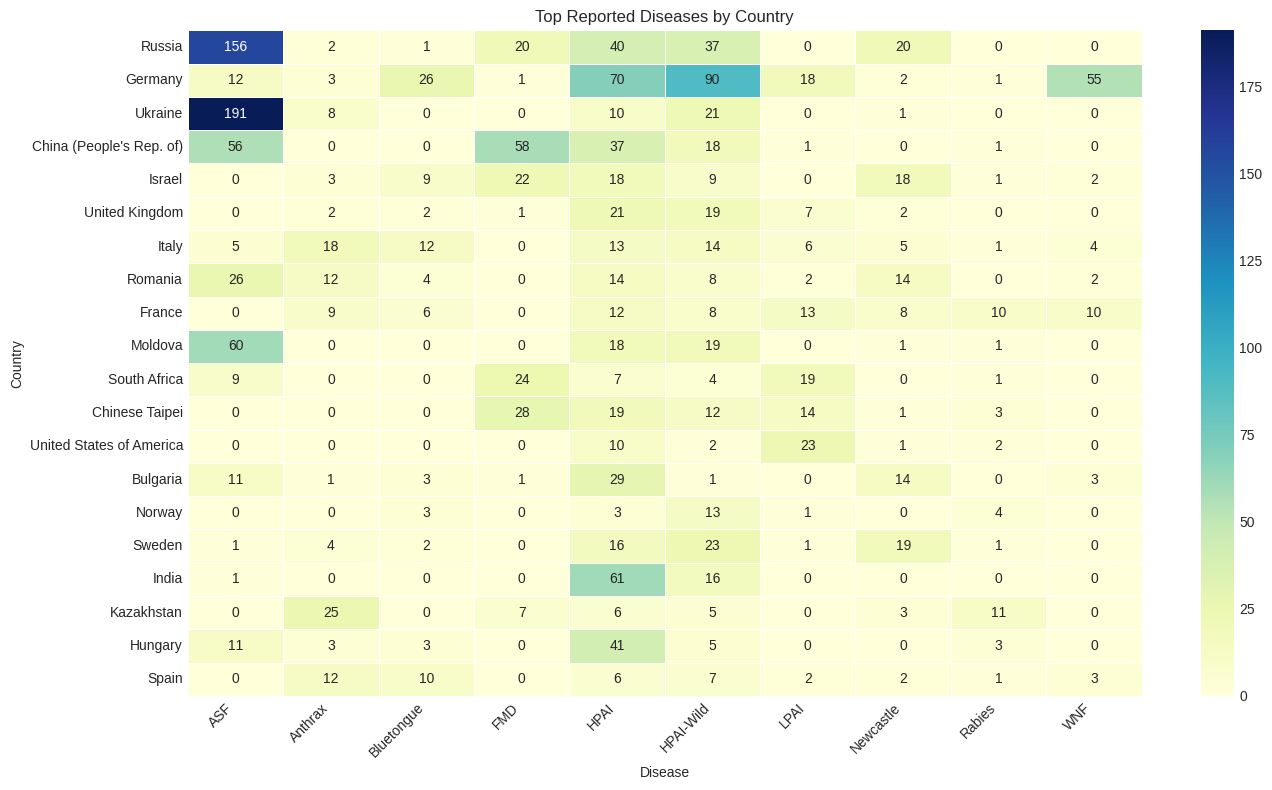

In [41]:
# Most frequent diseases and reporting countries
top_diseases = df['disease_short'].value_counts().head(10).index
top_countries = df['country'].value_counts().head(20).index

# Filter dataframe
df_filtered = df[df['disease_short'].isin(top_diseases) & df['country'].isin(top_countries)]

# Create pivot table
heatmap_data = (
    df_filtered.groupby(['country', 'disease_short'])
    .size()
    .unstack(fill_value=0)
    .loc[top_countries])

# Plot
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=0.5)
plt.title('Top Reported Diseases by Country')
plt.ylabel('Country')
plt.xlabel('Disease')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Temporal Trends in Animal Health Incident Reporting

This time series plot illustrates the number of animal health incident reports submitted to WAHIS each month from 2005 to 2025.

### Observations:

- **Gradual Growth (2005–2015)**: Reporting volume remained relatively low and stable during this period, averaging fewer than 30 reports per month.
- **Acceleration Phase (2016–2019)**: Starting around 2016, report volume began to increase more rapidly, possibly driven by:
  - Emerging diseases like African Swine Fever (ASF) and new Avian Influenza strains.
  - Improved digital infrastructure and data pipelines within WAHIS.
- **Volatility and Peaks (2020–2023)**: Spikes during the pandemic period may reflect heightened global awareness of zoonotic diseases, cross-border surveillance efforts, and increased compliance with international reporting obligations.
- **Surge in 2024–2025**: The sharp increase toward the right edge of the plot likely reflects a combination of:
  - Actual outbreak escalation
  - Expanded participation from new member countries
  - More granular reporting (e.g., separating outbreaks by strain or region)

### Contextual Factors:

Several external drivers may explain these trends:
- Expanded OIE/WOAH guidelines and disease list
- Regional disease pressure in Eastern Europe, Asia, and Sub-Saharan Africa
- Trade policies mandating transparency for export/import approvals
- Post-COVID surveillance systems that also track animal outbreaks

---
The upward trajectory suggests a growing global emphasis on animal disease monitoring, possibly in response to lessons learned from both economic disruptions (e.g., ASF in China) and public health crises (e.g., COVID-19 as a zoonotic event).



In [7]:
df['year_month'] = df['date_reported'].dt.to_period('M')
monthly = df.groupby('year_month').size().reset_index()
monthly.rename(columns={0: 'count'}, inplace=True)
monthly['year_month'] = monthly['year_month'].astype(str)

fig = px.line(monthly, x='year_month', y='count', title='Monthly Report Volume')
fig.update_layout(xaxis_title="Date", yaxis_title="Report Count")
fig.show()

In [8]:
monthly['rolling_avg'] = monthly['count'].rolling(window=6).mean()
px.line(monthly, x='year_month', y='rolling_avg', title='6-Month Rolling Average of Report Volume')


## Inferred Affected Species

This chart shows the distribution of animal species impacted by reported disease events, based on inferred classification from disease names.

### Key Insights:

- **Poultry accounts for the largest share (37.6%)** of reported incidents. This aligns with the dominance of Avian Influenza in the top disease list and reflects the poultry sector's high density, global trade volume, and susceptibility to fast-spreading pathogens.
  
- **Swine (14%) and Cattle (7.5%)** follow, reflecting their importance in food production and their involvement in major reportable diseases like African Swine Fever and Foot and Mouth Disease.

- **A significant portion (33.9%) of cases are listed as Unknown.**  
  This is a crucial insight — it may result from:
  - General disease names without species indicators (e.g., "Anthrax")
  - Aggregated outbreak reports
  - Gaps in the original reporting fields

- **Minor species** such as Horse (3.0%), Canine (2.8%), and Goat (1.2%) appear far less frequently. This may reflect lower incidence or simply underreporting due to lack of monitoring infrastructure in companion or smallholder animal sectors.


---
The chart reflects not just what species are affected, but what species are prioritized in disease surveillance systems. Poultry and swine dominate reporting because of their economic value, disease impact, and ease of mass testing. Wildlife and smaller ruminants likely face under-detection in most regions.



In [9]:
fig = px.pie(df, names='species', title='Inferred Species Distribution')
fig.update_traces(textinfo='percent+label')
fig.show()

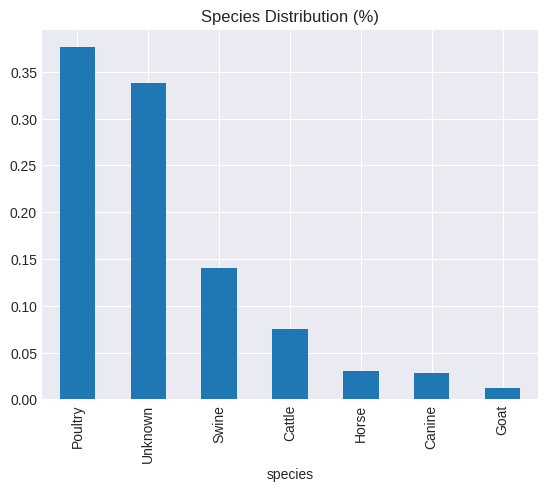

In [11]:
df['species'].value_counts(normalize=True).plot(kind='bar', title="Species Distribution (%)");

## Trend of Highly Pathogenic Avian Influenza (HPAI) Reports Over Time

This time series depicts monthly reports of Highly Pathogenic Avian Influenza (HPAI) in poultry as recorded by WAHIS from 2005 to 2025.

### Observations:

- **2005–2015: Low and sporadic reporting**  
  During this period, HPAI incidents were relatively rare or underreported. Global concern existed, but surveillance systems and harmonized reporting were still maturing.

- **2015–2020: Noticeable increase in event frequency**  
  Around 2015, global outbreaks of HPAI — particularly H5N1 and H5N8 strains — began affecting Europe, Asia, and Africa with increasing regularity. The reporting spike likely reflects both outbreak activity and enhanced international coordination.

- **2020–2025: Sharp rise and volatility in monthly reports**  
  The past five years have seen **consistent surges** in HPAI submissions. This coincides with:
  - Widespread outbreaks across Europe, Japan, and North America
  - Increased public and government focus on zoonotic diseases post-COVID
  - Surveillance expansion and stricter trade reporting requirements

### Contextual Significance:

- **Avian Influenza is a global economic threat** due to mass poultry culling, trade restrictions, and food system disruption.
- **Public health implications** also play a role: some HPAI strains are zoonotic and pose pandemic risk (e.g., H5N1 spillovers in mammals).
- This trend confirms HPAI's status as a **high-priority disease** within national and international biosecurity strategies.


---
This is more than just an increase in case count — it reflects a shift in the **frequency, scale, and policy response** to a disease that has become a persistent global concern. The upward trajectory underscores the need for continued investment in **surveillance, cross-border coordination, and rapid response systems**.


In [18]:
top_disease = df['disease'].value_counts().idxmax()
df_top = df.loc[df['disease'] == top_disease].copy()
df_top['year_month'] = df_top['date_reported'].dt.to_period('M').astype(str)



# Apply groupby and reset_index separately
grouped_data = df_top.groupby('year_month').size()
grouped_data = grouped_data.reset_index(name='count')  # Apply reset_index separately

# Now use the grouped_data in px.line
fig = px.line(grouped_data, x='year_month', y='count', title=f"Trend of {top_disease} Reports Over Time")
fig.show();

# Strategic Interpretation of Insights

The patterns uncovered in this analysis tell a deeper story about how animal disease threats are unfolding, how systems are responding, and where attention is intensifying.

### Shifts in Global Attention
The sharp increase in reporting over the past decade reflects more than surveillance growth — it signals a recalibration of priorities. The global system is becoming more reactive to zoonotic risk, agricultural stability, and transboundary disease emergence.

### Regional Pressure Points
Eastern Europe’s concentrated burden of African Swine Fever and Asia’s persistent battle with Avian Influenza show where biological and economic vulnerability intersect. These zones require sustained monitoring not because they are uniquely affected, but because they sit at the confluence of animal movement, production intensity, and porous borders.

### Predictive Potential in Historical Signals
Time series trends reveal patterns that often precede full-scale outbreaks. The lead-up to major HPAI surges, for instance, can often be seen in a slow ramp-up of regional submissions. Historical recurrence and reporting density provide a basis for building early warning systems.

### Species-Specific Risk Prioritization
Poultry, swine, and cattle dominate not just due to outbreak frequency, but because of the cascading implications: food supply chains, cross-border trade restrictions, and economic shocks. Surveillance reflects these stakes — less so ecological or biodiversity impact, which remain underreported.

### Surveillance Disparities
The high percentage of cases tagged with “Unknown” species or vague identifiers highlights existing data integrity gaps. These missing labels can obscure the real epidemiological picture and delay the response in multi-host or wildlife-driven outbreaks.

### Policy Feedback Loops
Certain diseases — like ASF and HPAI — are caught in a feedback loop of response, regulation, and reporting. Their visibility reinforces their monitoring, which further inflates their apparent prevalence. Other diseases may go unseen not due to rarity, but because they exist outside of this loop.

---

## What This Tells Us

This data isn’t just about where diseases occur — it’s about where attention goes, **where systems are stressed**, and how biosecurity is interpreted differently across geographies. It's a map of how the world prioritizes animal health risk, responds to instability, and communicates urgency.
